In [7]:
import numpy as np
import pandas as pd
from rulevetting.projects.tbi_pecarn.dataset import Dataset
from rulevetting.projects.tbi_pecarn.dataset import AgeSplit
from sklearn import metrics
pd.set_option("display.max_colwidth",1000)

/usr/local/lib/python3.9/site-packages/redis/connection.py:77: UserWarning: redis-py works best with hiredis. Please consider installing
  warnings.warn(msg)


# Read data

6 kidds of data (judgment calls)
age <=2, >2, invariant
include or exclude subvariables

In [8]:
df_train_old, df_tune_old, df_test_old = Dataset().get_data(split_age=AgeSplit.OLD,load_csvs=False)
df_train_old = df_train_old.drop(columns=['AgeinYears','Race','Gender'])
df_tune_old = df_tune_old.drop(columns=['AgeinYears','Race','Gender'])
df_test_old = df_test_old.drop(columns=['AgeinYears','Race','Gender'])
X_train_old = df_train_old.drop(columns="outcome")
y_train_old = df_train_old["outcome"].values
X_tune_old = df_tune_old.drop(columns="outcome")
y_tune_old = df_tune_old["outcome"].values
X_test_old = df_test_old.drop(columns="outcome")
y_test_old = df_test_old["outcome"].values

df_train_young, df_tune_young, df_test_young = Dataset().get_data(split_age=AgeSplit.YOUNG,load_csvs=False)
df_train_young = df_train_young.drop(columns=['AgeinYears','Race','Gender'])
df_tune_young = df_tune_young.drop(columns=['AgeinYears','Race','Gender'])
df_test_young = df_test_young.drop(columns=['AgeinYears','Race','Gender'])
X_train_young = df_train_young.drop(columns="outcome")
y_train_young = df_train_young["outcome"].values
X_tune_young = df_tune_young.drop(columns="outcome")
y_tune_young = df_tune_young["outcome"].values
X_test_young = df_test_young.drop(columns="outcome")
y_test_young = df_test_young["outcome"].values

df_train_all, df_tune_all, df_test_all = Dataset().get_data(split_age=AgeSplit.AGEINVARIANT,load_csvs=False)
df_train_all = df_train_all.drop(columns=['AgeinYears','Race','Gender'])
df_tune_all = df_tune_all.drop(columns=['AgeinYears','Race','Gender'])
df_test_all = df_test_all.drop(columns=['AgeinYears','Race','Gender'])
X_train_all = df_train_all.drop(columns="outcome")
y_train_all = df_train_all["outcome"].values
X_tune_all = df_tune_all.drop(columns="outcome")
y_tune_all = df_tune_all["outcome"].values
X_test_all = df_test_all.drop(columns="outcome")
y_test_all = df_test_all["outcome"].values

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step10_SFx': 2, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 1, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 2, 'step16_SeizOccur': False, 'step17_LOC': 2, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': True, 'remove_constVal': True}}
kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step10_SFx': 2, 'step11_SFxBas': 3,

In [9]:
dset = Dataset()
# NOTE: This is just an example!
judg_calls = dset.get_judgement_calls_dictionary_default()
judg_calls["preprocess_data"]["step7_AMS"] = 1
judg_calls["preprocess_data"]["step8_OSI"] = 1
judg_calls["preprocess_data"]["step9_HEMA"] = 1
judg_calls["preprocess_data"]["step10_SFx"] = 1
judg_calls["preprocess_data"]["step11_SFxBas"] = 1
judg_calls["preprocess_data"]["step12_Clav"] = 1
judg_calls["preprocess_data"]["step13_NeuroD"] = 1
judg_calls["preprocess_data"]["step14_Vomit"] = 1
judg_calls["preprocess_data"]["step15_HA"] = 1
judg_calls["preprocess_data"]["step16_Seiz"] = 1
judg_calls["preprocess_data"]["step17_LOC"] = 1
judg_calls["extract_features"]["GCS"] = False

df_train_old_parent, df_tune_old_parent, df_test_old_parent = dset.get_data(split_age=AgeSplit.OLD,load_csvs=False, **judg_calls)
df_train_old_parent = df_train_old_parent.drop(columns=['AgeinYears','Race','Gender'])
df_tune_old_parent = df_tune_old_parent.drop(columns=['AgeinYears','Race','Gender'])
df_test_old_parent = df_test_old_parent.drop(columns=['AgeinYears','Race','Gender'])
X_train_old_parent = df_train_old_parent.drop(columns="outcome")
y_train_old_parent = df_train_old_parent["outcome"].values
X_tune_old_parent = df_tune_old_parent.drop(columns="outcome")
y_tune_old_parent = df_tune_old_parent["outcome"].values
X_test_old_parent = df_test_old_parent.drop(columns="outcome")
y_test_old_parent = df_test_old_parent["outcome"].values

df_train_young_parent, df_tune_young_parent, df_test_young_parent = Dataset().get_data(split_age=AgeSplit.YOUNG,load_csvs=False, **judg_calls)
df_train_young_parent = df_train_young_parent.drop(columns=['AgeinYears','Race','Gender'])
df_tune_young_parent = df_tune_young_parent.drop(columns=['AgeinYears','Race','Gender'])
df_test_young_parent = df_test_young_parent.drop(columns=['AgeinYears','Race','Gender'])
X_train_young_parent = df_train_young_parent.drop(columns="outcome")
y_train_young_parent = df_train_young_parent["outcome"].values
X_tune_young_parent = df_tune_young_parent.drop(columns="outcome")
y_tune_young_parent = df_tune_young_parent["outcome"].values
X_test_young_parent = df_test_young_parent.drop(columns="outcome")
y_test_young_parent = df_test_young_parent["outcome"].values

df_train_all_parent, df_tune_all_parent, df_test_all_parent = Dataset().get_data(split_age=AgeSplit.AGEINVARIANT,load_csvs=False, **judg_calls)
df_train_all_parent = df_train_all_parent.drop(columns=['AgeinYears','Race','Gender'])
df_tune_all_parent = df_tune_all_parent.drop(columns=['AgeinYears','Race','Gender'])
df_test_all_parent = df_test_all_parent.drop(columns=['AgeinYears','Race','Gender'])
X_train_all_parent = df_train_all_parent.drop(columns="outcome")
y_train_all_parent = df_train_all_parent["outcome"].values
X_tune_all_parent = df_tune_all_parent.drop(columns="outcome")
y_tune_all_parent = df_tune_all_parent["outcome"].values
X_test_all_parent = df_test_all_parent.drop(columns="outcome")
y_test_all_parent = df_test_all_parent["outcome"].values

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 1, 'step8_OSI': 1, 'step9_HEMA': 1, 'step10_SFx': 1, 'step11_SFxBas': 1, 'step12_Clav': 1, 'step13_NeuroD': 1, 'step14_Vomit': 1, 'step15_HA': 1, 'step15_HAStart': False, 'step16_Seiz': 1, 'step16_SeizOccur': False, 'step17_LOC': 1, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': False, 'remove_constVal': True}}
kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 1, 'step8_OSI': 1, 'step9_HEMA': 1, 'step10_SFx': 1, 'step11_SFxBas': 1

In [67]:
def CV_grl_fit(X_train_ori, X_tune_ori, y_train_ori, y_tune_ori, text):
    
    # 4folds CV
    X_train_cand0 = X_train_ori.iloc[np.arange(0,len(y_train_ori),3),:]
    X_train_cand1 = X_train_ori.iloc[np.arange(1,len(y_train_ori),3),:]
    X_train_cand2 = X_train_ori.iloc[np.arange(2,len(y_train_ori),3),:]
    X_train_list = [X_tune_ori, X_train_cand0, X_train_cand1, X_train_cand2].copy()
    y_train_cand0 = y_train_ori[np.arange(0,len(y_train_ori),3)]
    y_train_cand1 = y_train_ori[np.arange(1,len(y_train_ori),3)]
    y_train_cand2 = y_train_ori[np.arange(2,len(y_train_ori),3)]
    y_train_list = [y_tune_ori, y_train_cand0, y_train_cand1, y_train_cand2].copy()
    
    # fit models
    for CVstep in range(4):
        X_train = X_train_list.copy()
        X_train.pop(CVstep)
        X_train = pd.concat(X_train)
        y_train = y_train_list.copy()
        y_train.pop(CVstep)
        y_train = np.concatenate(y_train)
        X_tune = X_train_list[CVstep]
        y_tune = y_train_list[CVstep]
        for NMaxDepth in range(3,16):
            class_weight = {0: 1, 1: 100}
            grl = imodels.GreedyRuleListClassifier(max_depth=NMaxDepth, class_weight=class_weight, criterion='neg_corr')
            grl.fit(X_train, y_train, feature_names=list(X_train).copy(), verbose=False)
            stats, threshes = predict_and_save(grl, 'grl_' + text + '_NMaxDepth' + str(NMaxDepth) + '_CVstep' + str(CVstep),
                                                   X_train, X_tune, y_train, y_tune,
                                                   MODELS_DIR = './models'+ '/NMaxDepth' + str(NMaxDepth)+'/CVstep' + str(CVstep) +'/grl_' + text + '/')
         


In [68]:
def CV_grl_eva(X_train_ori, X_tune_ori, y_train_ori, y_tune_ori, text):
    
    # 4folds CV
    X_train_cand0 = X_train_ori.iloc[np.arange(0,len(y_train_ori),3),:]
    X_train_cand1 = X_train_ori.iloc[np.arange(1,len(y_train_ori),3),:]
    X_train_cand2 = X_train_ori.iloc[np.arange(2,len(y_train_ori),3),:]
    X_train_list = [X_tune_ori, X_train_cand0, X_train_cand1, X_train_cand2].copy()
    y_train_cand0 = y_train_ori[np.arange(0,len(y_train_ori),3)]
    y_train_cand1 = y_train_ori[np.arange(1,len(y_train_ori),3)]
    y_train_cand2 = y_train_ori[np.arange(2,len(y_train_ori),3)]
    y_train_list = [y_tune_ori, y_train_cand0, y_train_cand1, y_train_cand2].copy()
    
    # evaluate for fitted models
    res = {}
    for NMaxDepth in range(3,16):
        res[str(NMaxDepth)] = []
    for CVstep in range(4):
        for NMaxDepth in range(3,16):
            X_train = X_train_list.copy()
            X_train.pop(CVstep)
            X_train = pd.concat(X_train)
            y_train = y_train_list.copy()
            y_train.pop(CVstep)
            y_train = np.concatenate(y_train)
            X_tune = X_train_list[CVstep]
            y_tune = y_train_list[CVstep]
            suffixes = ['_train', '_tune']  # _train, _test1, _test2
            stats_list = {}
            for i, suffix in enumerate(suffixes):
                stats_list[suffix] = print_metrics(suffix, X_train, X_tune, y_train, y_tune, MODELS_DIR = './models'+ '/NMaxDepth' + str(NMaxDepth)+'/CVstep' + str(CVstep) +'/grl_' + text + '/')
            res[str(NMaxDepth)].append(stats_list['_tune'].copy())
    pkl.dump(res, open(oj('./models/CV_grl_res/', text + '.pkl'), 'wb'))
    return(res)

In [40]:
def CVBest_grl(X_train_ori, X_tune_ori, y_train_ori, y_tune_ori, text, NMaxDepth):
    
    # fit for CVstep = 0, here tune data is the validation set
    CVstep = 0

    X_train_cand0 = X_train_ori.iloc[np.arange(0,len(y_train_ori),3),:]
    X_train_cand1 = X_train_ori.iloc[np.arange(1,len(y_train_ori),3),:]
    X_train_cand2 = X_train_ori.iloc[np.arange(2,len(y_train_ori),3),:]
    X_train_list = [X_tune_ori, X_train_cand0, X_train_cand1, X_train_cand2].copy()
    y_train_cand0 = y_train_ori[np.arange(0,len(y_train_ori),3)]
    y_train_cand1 = y_train_ori[np.arange(1,len(y_train_ori),3)]
    y_train_cand2 = y_train_ori[np.arange(2,len(y_train_ori),3)]
    y_train_list = [y_tune_ori, y_train_cand0, y_train_cand1, y_train_cand2].copy()

    X_train = X_train_list.copy()
    X_train.pop(CVstep)
    X_train = pd.concat(X_train)
    y_train = y_train_list.copy()
    y_train.pop(CVstep)
    y_train = np.concatenate(y_train)
    X_tune = X_train_list[CVstep]
    y_tune = y_train_list[CVstep]

    grl = imodels.GreedyRuleListClassifier(max_depth=NMaxDepth)
    grl.fit(X_train, y_train, feature_names=list(X_train).copy())
    return(grl)

                


# Fit models

In [21]:
import os
import pickle as pkl
from os.path import join as oj

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree

import numpy as np
import pandas as pd

import imodels
from rulevetting.api import validation


MODELS_DIR = './models'
os.makedirs(MODELS_DIR, exist_ok=True)

outcome_def = 'outcome'  # output

In [22]:
def predict_and_save(model, model_name, X_train, X_tune, y_train, y_tune, MODELS_DIR = './models'):
    '''Plots cv and returns cv, saves all stats
    '''
    os.makedirs(MODELS_DIR, exist_ok=True)
    results = {'model': model}
    for x, y, suffix in zip([X_train, X_tune],
                            [y_train, y_tune],
                            ['_train', '_tune']):
        stats, threshes = validation.all_stats_curve(y, model.predict_proba(x)[:, 1],
                                                     plot=suffix == '_tune')
        for stat in stats.keys():
            results[stat + suffix] = stats[stat]
        results['threshes' + suffix] = threshes
    pkl.dump(results, open(oj(MODELS_DIR, model_name + '.pkl'), 'wb'))
    return stats, threshes

In [23]:
def print_metrics(suffix, X_train, X_tune, y_train, y_tune, MODELS_DIR = './models'):
    os.makedirs(MODELS_DIR, exist_ok=True)
    vals = {s: [] for s in ['sens', 'spec', 'ppv', 'npv', 'lr+', 'lr-', 'brier_score', 'f1']}
    fnames = []
    for fname in sorted(os.listdir(MODELS_DIR)):
        if 'pkl' in fname:
            if not fname[:-4] == 'rf':
                r = pkl.load(open(oj(MODELS_DIR, fname), 'rb'))
                threshes = np.array(r['threshes' + suffix])
                m = r['model']

                # add more stats
                for x, y, suff in zip([X_train, X_tune],
                                      [y_train, y_tune],
                                      ['_train', '_tune']):
                    if suff == suffix:
                        stats, threshes = validation.all_stats_curve(y, m.predict_proba(x)[:, 1],
                                                                     plot=suffix == '_tune')
                        preds_proba = m.predict_proba(x)[:, 1]
                        brier_score = metrics.brier_score_loss(y, preds_proba)

                # pick best vals
                sens = np.array(r['sens' + suffix])
                spec = np.array(r['spec' + suffix])
                best_idx = np.argmax(5 * sens + spec)
                for k in vals.keys():
                    if not k == 'brier_score':
                        #                         print('k', k)
                        vals[k].append(stats[k][best_idx])
                vals['brier_score'].append(brier_score)
                fnames.append(fname[:-4])
    stats = pd.DataFrame.from_dict(vals)
    stats.index = fnames
    return (stats).round(2).transpose()



# greedy (CART) rule list

/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 873.87it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 963.38it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: Runtim

100%|███████████████████████████████████████████| 7/7 [00:00<00:00, 1214.89it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1118.44it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|███████████████████████████████████████████| 9/9 [00:00<00:00, 1246.37it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, Non

100%|█████████████████████████████████████████| 12/12 [00:00<00:00, 1236.74it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|█████████████████████████████████████████| 14/14 [00:00<00:00, 1236.29it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|█████████████████████████████████████████| 14/14 [00:00<00:00, 1291.63it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, Non

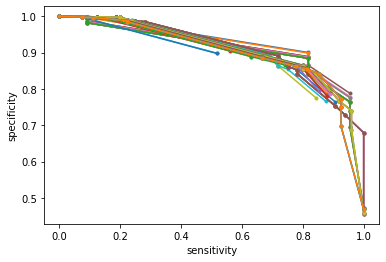

In [27]:
CV_grl_fit(X_train_old, X_tune_old, y_train_old, y_tune_old, 'Old_IncSub')


/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 864.03it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|███████████████████████████████████████████| 4/4 [00:00<00:00, 1034.74it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: Runtim

100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 1319.86it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|███████████████████████████████████████████| 7/7 [00:00<00:00, 1504.72it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1402.54it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, Non

100%|█████████████████████████████████████████| 11/11 [00:00<00:00, 1554.55it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|█████████████████████████████████████████| 11/11 [00:00<00:00, 1640.85it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|█████████████████████████████████████████| 11/11 [00:00<00:00, 1625.81it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, Non

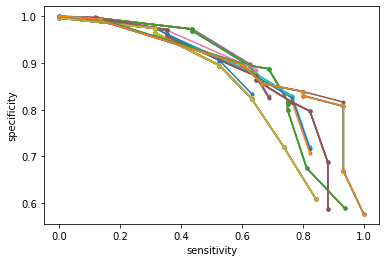

In [69]:
CV_grl_fit(X_train_young, X_tune_young, y_train_young, y_tune_young, 'Young_IncSub')

/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 292.39it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 828.63it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: Runtim

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 896.52it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 938.64it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 980.28it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, Non

100%|█████████████████████████████████████████| 12/12 [00:00<00:00, 1014.36it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|█████████████████████████████████████████| 14/14 [00:00<00:00, 1069.20it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|█████████████████████████████████████████| 14/14 [00:00<00:00, 1022.64it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, Non

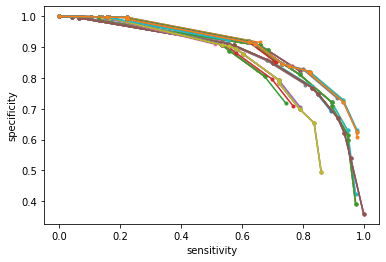

In [70]:
CV_grl_fit(X_train_all, X_tune_all, y_train_all, y_tune_all, 'AgeInvariant_IncSub')

/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 710.66it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|███████████████████████████████████████████| 4/4 [00:00<00:00, 1062.72it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: Runtim

100%|███████████████████████████████████████████| 7/7 [00:00<00:00, 1384.78it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|███████████████████████████████████████████| 7/7 [00:00<00:00, 1471.54it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|███████████████████████████████████████████| 7/7 [00:00<00:00, 1261.07it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, Non

100%|███████████████████████████████████████████| 5/5 [00:00<00:00, 1217.65it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|███████████████████████████████████████████| 5/5 [00:00<00:00, 1210.06it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|███████████████████████████████████████████| 5/5 [00:00<00:00, 1256.08it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, Non

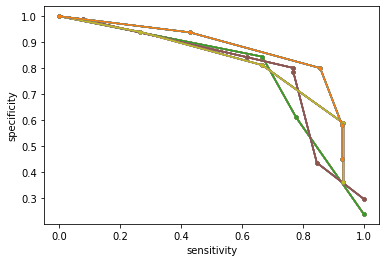

In [71]:
CV_grl_fit(X_train_old_parent, X_tune_old_parent, y_train_old_parent, y_tune_old_parent, 'Old_ExcSub')

/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 963.40it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 882.45it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: Runtim

100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 1130.59it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 1192.64it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 1249.17it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, Non

100%|███████████████████████████████████████████| 5/5 [00:00<00:00, 1186.24it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|███████████████████████████████████████████| 5/5 [00:00<00:00, 1033.44it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|███████████████████████████████████████████| 5/5 [00:00<00:00, 1049.78it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, Non

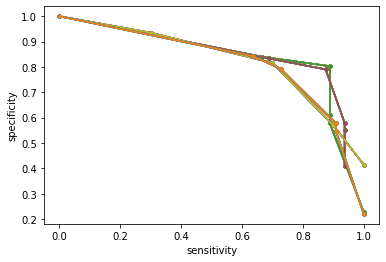

In [72]:
CV_grl_fit(X_train_all_parent, X_tune_all_parent, y_train_all_parent, y_tune_all_parent, 'AgeInvariant_ExcSub')

100%|█████████████████████████████████████████| 14/14 [00:00<00:00, 1247.19it/s]


{'3': [             grl_Old_IncSub_NMaxDepth3_CVstep0
  sens                                      0.82
  spec                                      0.90
  ppv                                       0.04
  npv                                       1.00
  lr+                                       8.20
  lr-                                       0.20
  brier_score                               0.01
  f1                                        0.08,
               grl_Old_IncSub_NMaxDepth3_CVstep1
  sens                                      0.56
  spec                                      0.90
  ppv                                       0.04
  npv                                       1.00
  lr+                                       5.88
  lr-                                       0.48
  brier_score                               0.01
  f1                                        0.08,
               grl_Old_IncSub_NMaxDepth3_CVstep2
  sens                                      0.64
  spec       

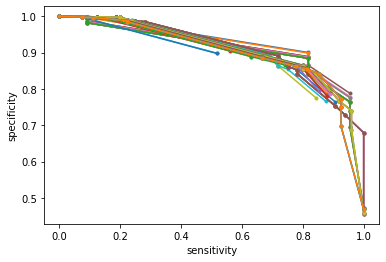

In [73]:
CV_grl_eva(X_train_old, X_tune_old, y_train_old, y_tune_old, 'Old_IncSub')

100%|█████████████████████████████████████████| 11/11 [00:00<00:00, 1467.61it/s]


{'3': [             grl_Young_IncSub_NMaxDepth3_CVstep0
  sens                                        0.31
  spec                                        0.98
  ppv                                         0.08
  npv                                         1.00
  lr+                                        12.88
  lr-                                         0.70
  brier_score                                 0.01
  f1                                          0.12,
               grl_Young_IncSub_NMaxDepth3_CVstep1
  sens                                        0.35
  spec                                        0.97
  ppv                                         0.08
  npv                                         1.00
  lr+                                        12.39
  lr-                                         0.67
  brier_score                                 0.01
  f1                                          0.13,
               grl_Young_IncSub_NMaxDepth3_CVstep2
  sens                  

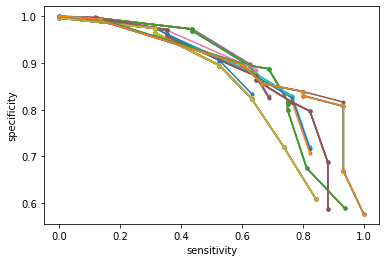

In [74]:
CV_grl_eva(X_train_young, X_tune_young, y_train_young, y_tune_young, 'Young_IncSub')

100%|█████████████████████████████████████████| 15/15 [00:00<00:00, 1269.67it/s]


{'3': [             grl_AgeInvariant_IncSub_NMaxDepth3_CVstep0
  sens                                               0.63
  spec                                               0.92
  ppv                                                0.04
  npv                                                1.00
  lr+                                                7.61
  lr-                                                0.40
  brier_score                                        0.01
  f1                                                 0.08,
               grl_AgeInvariant_IncSub_NMaxDepth3_CVstep1
  sens                                               0.53
  spec                                               0.91
  ppv                                                0.04
  npv                                                1.00
  lr+                                                6.25
  lr-                                                0.51
  brier_score                                        0.01
  f1    

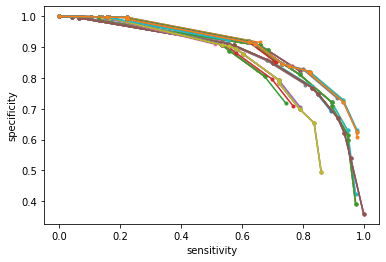

In [75]:
CV_grl_eva(X_train_all, X_tune_all, y_train_all, y_tune_all, 'AgeInvariant_IncSub')

100%|███████████████████████████████████████████| 5/5 [00:00<00:00, 1233.62it/s]


{'3': [             grl_Old_ExcSub_NMaxDepth3_CVstep0
  sens                                      0.67
  spec                                      0.84
  ppv                                       0.06
  npv                                       0.99
  lr+                                       4.28
  lr-                                       0.39
  brier_score                               0.01
  f1                                        0.11,
               grl_Old_ExcSub_NMaxDepth3_CVstep1
  sens                                      0.62
  spec                                      0.84
  ppv                                       0.08
  npv                                       0.99
  lr+                                       3.91
  lr-                                       0.46
  brier_score                               0.02
  f1                                        0.14,
               grl_Old_ExcSub_NMaxDepth3_CVstep2
  sens                                      0.67
  spec       

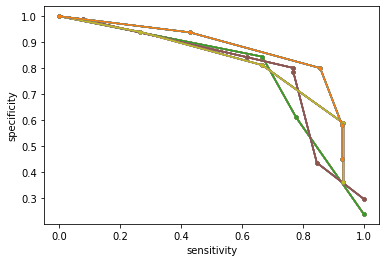

In [76]:
CV_grl_eva(X_train_old_parent, X_tune_old_parent, y_train_old_parent, y_tune_old_parent, 'Old_ExcSub')

100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 1288.11it/s]


{'3': [             grl_AgeInvariant_ExcSub_NMaxDepth3_CVstep0
  sens                                               0.89
  spec                                               0.80
  ppv                                                0.06
  npv                                                1.00
  lr+                                                4.51
  lr-                                                0.14
  brier_score                                        0.01
  f1                                                 0.11,
               grl_AgeInvariant_ExcSub_NMaxDepth3_CVstep1
  sens                                               0.88
  spec                                               0.79
  ppv                                                0.09
  npv                                                1.00
  lr+                                                4.18
  lr-                                                0.16
  brier_score                                        0.02
  f1    

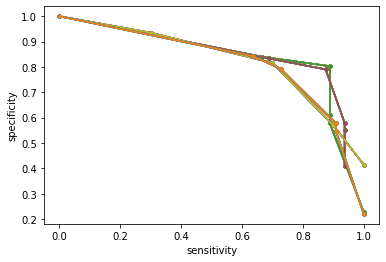

In [77]:
CV_grl_eva(X_train_all_parent, X_tune_all_parent, y_train_all_parent, y_tune_all_parent, 'AgeInvariant_ExcSub')

## Pick the best one and test

In [35]:
def get_metrics(x, k = 5, cons = 0.5):
    if x[1] >= cons:
        return(k*x[0]+x[1])
    else:
        return(-1)

#### Old_IncSub

In [37]:
text = 'Old_IncSub'
r = pkl.load(open(oj('./models/CV_grl_res/', text + '.pkl'), 'rb'))

res = {}

for NMaxDepth in range(3,16):
    res[str(NMaxDepth)] = 0
    for CVstep in range(4):
        res_metrics = list()
        for i in range(r[str(NMaxDepth)][CVstep].shape[1]):
            res_metrics.append(get_metrics(r[str(NMaxDepth)][CVstep].iloc[:2,i]))
        res[str(NMaxDepth)] += np.array(res_metrics.copy()).max()/4
res

{'3': 4.075,
 '4': 4.15,
 '5': 4.414999999999999,
 '6': 4.7225,
 '7': 4.77,
 '8': 5.19,
 '9': 5.279999999999999,
 '10': 5.3149999999999995,
 '11': 5.4,
 '12': 5.475,
 '13': 3.9325,
 '14': 3.9325,
 '15': 3.9325}

In [49]:
grl = CVBest_grl(X_train_old, X_tune_old, y_train_old, y_tune_old, text, 8)
#print(grl)

mean 0.007 (12732 pts)
if SFxBasHem_1 >= 1.0 then 0.275 (40 pts)
mean 0.006 (12692 pts)
if feat 51 >= 1.0 then 0.029 (1262 pts)
mean 0.003 (11430 pts)
if feat 53 >= 1.0 then 0.25 (8 pts)
mean 0.003 (11422 pts)
if feat 99 >= 1.0 then 0.051 (118 pts)
mean 0.002 (11304 pts)
if feat 22 >= 1.0 then 0.021 (340 pts)
mean 0.002 (10964 pts)
if feat 115 >= 1.0 then 0.091 (11 pts)
mean 0.002 (10953 pts)
if feat 3 >= 1.0 then 0.008 (992 pts)
mean 0.001 (9961 pts)
if feat 124 >= 1.0 then 0.02 (100 pts)



In [52]:
## maybe do not interpretation now. Compare the performance
#lst = [list(X_train_old).copy()[i] for i in [51,53,99,22,115,3,124]]
#lst.insert(0, 'SFxBasHem_1')
#lst

100%|███████████████████████████████████████████| 7/7 [00:00<00:00, 1014.20it/s]


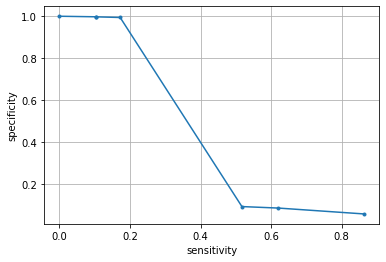

In [51]:
_ = validation.all_stats_curve(y_test_old, grl.predict_proba(X_test_old)[:, 1], plot=True)

#### Young_IncSub

In [78]:
text = 'Young_IncSub'
r = pkl.load(open(oj('./models/CV_grl_res/', text + '.pkl'), 'rb'))

res = {}

for NMaxDepth in range(3,16):
    res[str(NMaxDepth)] = 0
    for CVstep in range(4):
        res_metrics = list()
        for i in range(r[str(NMaxDepth)][CVstep].shape[1]):
            res_metrics.append(get_metrics(r[str(NMaxDepth)][CVstep].iloc[:2,i]))
        res[str(NMaxDepth)] += np.array(res_metrics.copy()).max()/4
res

{'3': 2.3675,
 '4': 3.0900000000000003,
 '5': 3.0900000000000003,
 '6': 3.9775,
 '7': 4.15,
 '8': 4.4325,
 '9': 4.7075,
 '10': 4.915000000000001,
 '11': 4.9425,
 '12': 5.1925,
 '13': 5.1925,
 '14': 5.1925,
 '15': 5.1925}

In [83]:
grl = CVBest_grl(X_train_young, X_tune_young, y_train_young, y_tune_young, text, 9)
#print(grl)

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 966.50it/s]


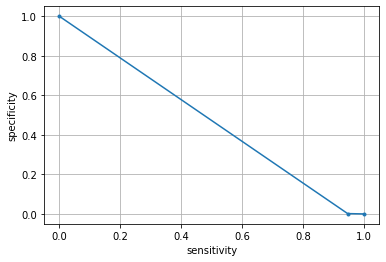

In [84]:
_ = validation.all_stats_curve(y_test_young, grl.predict_proba(X_test_young)[:, 1], plot=True)

#### Ageinvariant_IncSub

In [85]:
text = 'Ageinvariant_IncSub'
r = pkl.load(open(oj('./models/CV_grl_res/', text + '.pkl'), 'rb'))

res = {}

for NMaxDepth in range(3,16):
    res[str(NMaxDepth)] = 0
    for CVstep in range(4):
        res_metrics = list()
        for i in range(r[str(NMaxDepth)][CVstep].shape[1]):
            res_metrics.append(get_metrics(r[str(NMaxDepth)][CVstep].iloc[:2,i]))
        res[str(NMaxDepth)] += np.array(res_metrics.copy()).max()/4
res

{'3': 3.7025,
 '4': 3.865,
 '5': 4.237500000000001,
 '6': 4.365,
 '7': 4.54,
 '8': 4.585000000000001,
 '9': 4.705,
 '10': 4.925000000000001,
 '11': 5.1375,
 '12': 5.1825,
 '13': 3.6875,
 '14': 3.6875,
 '15': 3.6875}

In [86]:
grl = CVBest_grl(X_train_all, X_tune_all, y_train_all, y_tune_all, text, 10)
#print(grl)

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 857.12it/s]


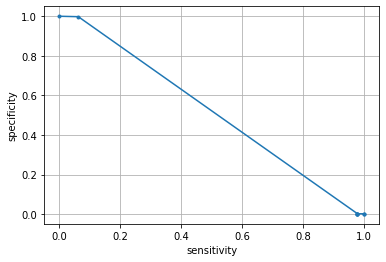

In [87]:
_ = validation.all_stats_curve(y_test_all, grl.predict_proba(X_test_all)[:, 1], plot=True)

#### Old_ExcSub

In [88]:
text = 'Old_ExcSub'
r = pkl.load(open(oj('./models/CV_grl_res/', text + '.pkl'), 'rb'))

res = {}

for NMaxDepth in range(3,16):
    res[str(NMaxDepth)] = 0
    for CVstep in range(4):
        res_metrics = list()
        for i in range(r[str(NMaxDepth)][CVstep].shape[1]):
            res_metrics.append(get_metrics(r[str(NMaxDepth)][CVstep].iloc[:2,i]))
        res[str(NMaxDepth)] += np.array(res_metrics.copy()).max()/4
res

{'3': 4.3475,
 '4': 3.5300000000000002,
 '5': 3.5300000000000002,
 '6': 2.1175,
 '7': 2.1175,
 '8': 2.1175,
 '9': 2.1175,
 '10': 2.1175,
 '11': 2.1175,
 '12': 2.1175,
 '13': 2.1175,
 '14': 2.1175,
 '15': 2.1175}

In [92]:
grl = CVBest_grl(X_train_old_parent, X_tune_old_parent, y_train_old_parent, y_tune_old_parent, text, 3)
#print(grl)

In [93]:
## maybe do not interpretation now. Compare the performance
#lst = [list(X_train_old).copy()[i] for i in [51,53,99,22,115,3,124]]
#lst.insert(0, 'SFxBasHem_1')
#lst

100%|███████████████████████████████████████████| 3/3 [00:00<00:00, 1138.52it/s]


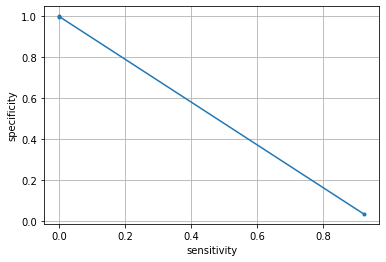

In [94]:
_ = validation.all_stats_curve(y_test_old_parent, grl.predict_proba(X_test_old_parent)[:, 1], plot=True)

#### Ageinvariant_ExcSub

In [95]:
text = 'Ageinvariant_ExcSub'
r = pkl.load(open(oj('./models/CV_grl_res/', text + '.pkl'), 'rb'))

res = {}

for NMaxDepth in range(3,16):
    res[str(NMaxDepth)] = 0
    for CVstep in range(4):
        res_metrics = list()
        for i in range(r[str(NMaxDepth)][CVstep].shape[1]):
            res_metrics.append(get_metrics(r[str(NMaxDepth)][CVstep].iloc[:2,i]))
        res[str(NMaxDepth)] += np.array(res_metrics.copy()).max()/4
res

{'3': 4.800000000000001,
 '4': 3.665,
 '5': 2.1325,
 '6': 2.1325,
 '7': 2.1325,
 '8': 2.1325,
 '9': 2.1325,
 '10': 2.1325,
 '11': 2.1325,
 '12': 2.1325,
 '13': 2.1325,
 '14': 2.1325,
 '15': 2.1325}

In [92]:
grl = CVBest_grl(X_train_all_parent, X_tune_all_parent, y_train_all_parent, y_tune_all_parent, text, 3)
#print(grl)

In [93]:
## maybe do not interpretation now. Compare the performance
#lst = [list(X_train_old).copy()[i] for i in [51,53,99,22,115,3,124]]
#lst.insert(0, 'SFxBasHem_1')
#lst

100%|███████████████████████████████████████████| 3/3 [00:00<00:00, 1194.73it/s]


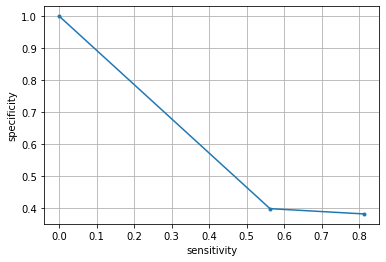

In [96]:
_ = validation.all_stats_curve(y_test_all_parent, grl.predict_proba(X_test_all_parent)[:, 1], plot=True)